In [1]:
from time import time
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer , scale
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
pisos = pd.read_csv('houses_Madrid.csv')

In [3]:
pisos.head()

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,True,True,True,True


In [4]:
pisos.drop(columns=['Unnamed: 0'], inplace=True)
pisos.set_index('id', inplace=True)
pisos.head()

,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
id,,,,,,,,,,,,,,,,,,,,,
21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,True,True,True,True


In [5]:
print('filas y columnas: {}'.format(pisos.shape))
print('Tamaño de los datos: {}'.format(pisos.size))

filas y columnas: (21742, 56)
Tamaño de los datos: 1217552


In [6]:
pisos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21742 entries, 21742 to 1
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         21742 non-null  object 
 1   subtitle                      21742 non-null  object 
 2   sq_mt_built                   21616 non-null  float64
 3   sq_mt_useful                  8228 non-null   float64
 4   n_rooms                       21742 non-null  int64  
 5   n_bathrooms                   21726 non-null  float64
 6   n_floors                      1437 non-null   float64
 7   sq_mt_allotment               1432 non-null   float64
 8   latitude                      0 non-null      float64
 9   longitude                     0 non-null      float64
 10  raw_address                   16277 non-null  object 
 11  is_exact_address_hidden       21742 non-null  bool   
 12  street_name                   15837 non-null  object 
 13  s

In [7]:
print('Datos duplicados: {}'.format(pisos.duplicated().sum()))
print('Datos nulos: {}'.format(pisos.isna().sum().sort_values()))

Datos duplicados: 179
Datos nulos: title                               0
has_parking                         0
energy_certificate                  0
is_buy_price_known                  0
buy_price_by_area                   0
buy_price                           0
is_rent_price_known                 0
rent_price                          0
operation                           0
neighborhood_id                     0
is_exact_address_hidden             0
is_renewal_needed                   0
n_rooms                             0
subtitle                            0
n_bathrooms                        16
sq_mt_built                       126
house_type_id                     391
is_new_development                992
is_floor_under                   1170
has_lift                         2386
floor                            2607
is_exterior                      3043
raw_address                      5465
street_name                      5905
has_central_heating              8134
has_individual_

In [8]:
pisos.columns

Index(['title', 'subtitle', 'sq_mt_built', 'sq_mt_useful', 'n_rooms',
       'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'latitude', 'longitude',
       'raw_address', 'is_exact_address_hidden', 'street_name',
       'street_number', 'portal', 'floor', 'is_floor_under', 'door',
       'neighborhood_id', 'operation', 'rent_price', 'rent_price_by_area',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'are_pets_allowed', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_furnished', 'is_kitchen_equipped', 'is_accessible',
       'has_green_zones', 'energy_certificate', 'has_parking',
       'has_private_parking', 'has_public_parking',
       'is_parking_included_in_price', 'parking_price', 'is_orien

In [9]:
print(pisos.shape)
pisos.head()

(21742, 56)


,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
id,,,,,,,,,,,,,,,,,,,,,
21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,True,True,True,True


In [10]:
#DF of buy price only if buy price known
Venta=pisos[pisos['is_buy_price_known']==True]
Venta=Venta['buy_price']
Venta.describe()

count    2.174200e+04
mean     6.537356e+05
std      7.820821e+05
min      3.600000e+04
25%      1.980000e+05
50%      3.750000e+05
75%      7.636000e+05
max      8.800000e+06
Name: buy_price, dtype: float64

In [11]:
Alquiler=pisos[pisos['is_rent_price_known']==True]
Alquiler=Alquiler['rent_price']
Alquiler.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: rent_price, dtype: float64

In [12]:
pisos.drop(columns=['title', 'subtitle', 'sq_mt_useful','n_floors', 
       'sq_mt_allotment', 'latitude', 'longitude',
       'raw_address', 'is_exact_address_hidden', 'street_name',
       'street_number', 'portal', 'door',
       'rent_price_by_area',
       'is_rent_price_known', 'buy_price_by_area',
       'is_buy_price_known', 'is_furnished',
       'has_central_heating', 'rent_price',
       'are_pets_allowed',
       'is_kitchen_equipped',
       'energy_certificate', 'has_parking',
       'has_private_parking', 'has_public_parking',
       'is_parking_included_in_price', 'parking_price', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east'], inplace=True)

In [13]:
pisos.shape

(21742, 24)

In [14]:
pisos.describe().T

,count,mean,std,min,25%,50%,75%,max
sq_mt_built,21616.0,146.920892,134.181865,13.0,70.0,100.0,162.0,999.0
n_rooms,21742.0,3.005749,1.510497,0.0,2.0,3.0,4.0,24.0
n_bathrooms,21726.0,2.091687,1.406992,1.0,1.0,2.0,2.0,16.0
buy_price,21742.0,653735.647503,782082.069836,36000.0,198000.0,375000.0,763600.0,8800000.0
built_year,10000.0,1970.046400,69.386705,1723.0,1957.0,1970.0,1994.0,8170.0


In [15]:
pisos.head()

,sq_mt_built,n_rooms,n_bathrooms,floor,is_floor_under,neighborhood_id,operation,buy_price,house_type_id,is_renewal_needed,...,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones
id,,,,,,,,,,,,,,,,,,,,,
21742,64.0,2,1.0,3,False,Neighborhood 135: San Cristóbal (1308.89 €/m2)...,sale,85000,HouseType 1: Pisos,False,...,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21741,70.0,3,1.0,4,False,Neighborhood 132: Los Ángeles (1796.68 €/m2) -...,sale,129900,HouseType 1: Pisos,True,...,True,True,True,NaN,NaN,True,NaN,NaN,NaN,NaN
21740,94.0,2,2.0,1,False,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,144247,HouseType 1: Pisos,False,...,True,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN
21739,64.0,2,1.0,Bajo,True,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,109900,HouseType 1: Pisos,False,...,NaN,True,True,NaN,NaN,NaN,NaN,True,True,NaN
21738,108.0,2,2.0,4,False,Neighborhood 133: Los Rosales (1827.79 €/m2) -...,sale,260000,HouseType 1: Pisos,False,...,True,True,True,NaN,True,NaN,NaN,True,NaN,True


In [16]:
corr = pisos.corr()
corr

,sq_mt_built,n_rooms,n_bathrooms,buy_price,is_renewal_needed,built_year
sq_mt_built,1.000000,0.715981,0.852856,0.832039,0.061207,0.056167
n_rooms,0.715981,1.000000,0.729152,0.608893,0.171408,0.019483
n_bathrooms,0.852856,0.729152,1.000000,0.772218,0.000692,0.066458
buy_price,0.832039,0.608893,0.772218,1.000000,0.044302,0.008514
is_renewal_needed,0.061207,0.171408,0.000692,0.044302,1.000000,-0.089610
built_year,0.056167,0.019483,0.066458,0.008514,-0.089610,1.000000


In [17]:
pisos.corr()['buy_price'].sort_values(ascending=False)

buy_price            1.000000
sq_mt_built          0.832039
n_bathrooms          0.772218
n_rooms              0.608893
is_renewal_needed    0.044302
built_year           0.008514
Name: buy_price, dtype: float64

<AxesSubplot:>

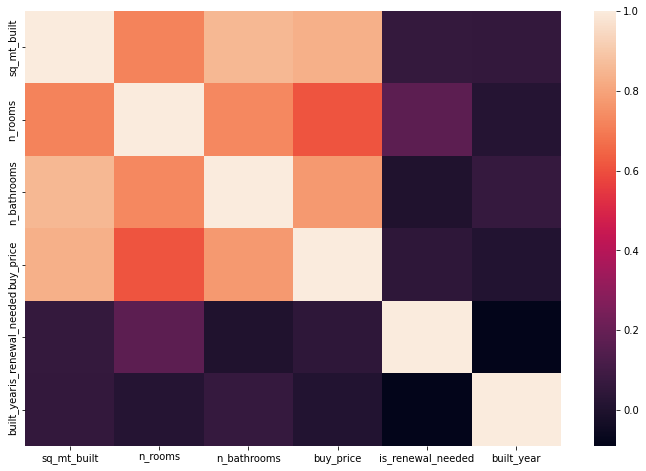

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(corr)

Precio más alto de piso en el Dataset:  8800000


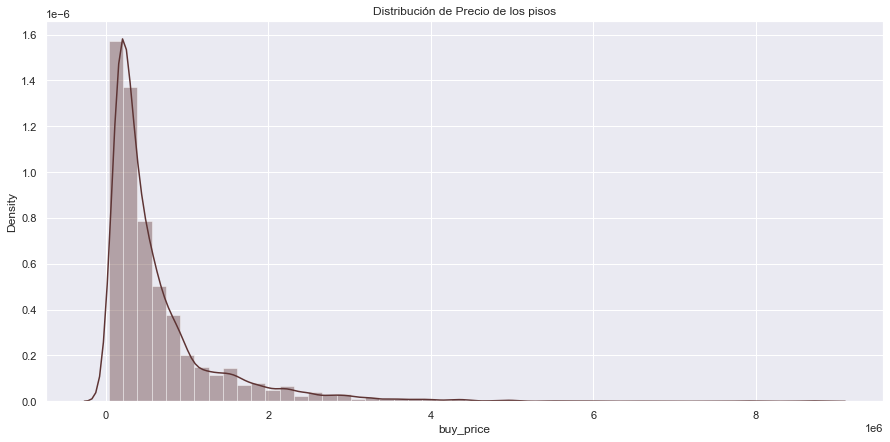

In [79]:
plt.figure(figsize=(15, 7))
sns.distplot(pisos["buy_price"], color="#5E3434")
plt.xlabel("buy_price")
plt.title("Distribución de Precio de los pisos")
print("Precio más alto de piso en el Dataset: ", pisos["buy_price"].max())
plt.show()

In [19]:
pisos.dtypes
for col in pisos:
    print(col)
    print(pisos[col].value_counts())
    print('')

sq_mt_built
70.0     494
60.0     484
80.0     427
65.0     377
90.0     357
        ... 
628.0      1
747.0      1
770.0      1
489.0      1
427.0      1
Name: sq_mt_built, Length: 678, dtype: int64

n_rooms
3     7214
2     5499
4     3367
1     2267
5     1757
6      715
0      439
7      259
8      112
9       54
10      26
11      10
12       9
13       6
24       3
15       2
16       1
18       1
14       1
Name: n_rooms, dtype: int64

n_bathrooms
1.0     9084
2.0     7408
3.0     2429
4.0     1170
5.0      871
6.0      422
7.0      182
8.0       94
9.0       37
10.0      13
11.0       7
14.0       3
13.0       3
12.0       1
15.0       1
16.0       1
Name: n_bathrooms, dtype: int64

floor
1                       4440
2                       3546
3                       3001
4                       2323
Bajo                    2144
5                       1310
6                        913
7                        556
8                        326
Entreplanta exterior     236
9   

In [20]:
varios=['has_ac','has_fitted_wardrobes','has_garden','has_pool','has_terrace','has_balcony','has_storage_room','is_accessible','has_green_zones']
for col in varios:
    pisos[col]=pisos[col].fillna(False)
pisos

,sq_mt_built,n_rooms,n_bathrooms,floor,is_floor_under,neighborhood_id,operation,buy_price,house_type_id,is_renewal_needed,...,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones
id,,,,,,,,,,,,,,,,,,,,,
21742,64.0,2,1.0,3,False,Neighborhood 135: San Cristóbal (1308.89 €/m2)...,sale,85000,HouseType 1: Pisos,False,...,False,False,True,False,False,False,False,False,False,False
21741,70.0,3,1.0,4,False,Neighborhood 132: Los Ángeles (1796.68 €/m2) -...,sale,129900,HouseType 1: Pisos,True,...,True,True,True,False,False,True,False,False,False,False
21740,94.0,2,2.0,1,False,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,144247,HouseType 1: Pisos,False,...,True,True,True,False,False,False,False,True,False,False
21739,64.0,2,1.0,Bajo,True,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,109900,HouseType 1: Pisos,False,...,False,True,True,False,False,False,False,True,True,False
21738,108.0,2,2.0,4,False,Neighborhood 133: Los Rosales (1827.79 €/m2) -...,sale,260000,HouseType 1: Pisos,False,...,True,True,True,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,78.0,2,2.0,4,False,Neighborhood 10: Casco Histórico de Barajas (3...,sale,350000,HouseType 5: Áticos,False,...,True,True,True,False,False,False,False,True,False,False
4,96.0,2,2.0,3,False,Neighborhood 9: Campo de las Naciones-Corralej...,sale,425000,HouseType 1: Pisos,False,...,True,True,True,False,True,False,False,True,False,True
3,175.0,4,2.0,Bajo,True,Neighborhood 9: Campo de las Naciones-Corralej...,sale,680000,HouseType 1: Pisos,False,...,True,False,True,False,True,True,False,True,False,False


In [21]:
pisos['house_type_id']=pisos['house_type_id'].fillna("Misc")

In [22]:
pisos=pd.get_dummies(pisos,columns=['house_type_id'])
#Need to drop one, so why not drop the one I created
pisos.drop(columns='house_type_id_Misc', inplace=True)
pisos

,sq_mt_built,n_rooms,n_bathrooms,floor,is_floor_under,neighborhood_id,operation,buy_price,is_renewal_needed,is_new_development,...,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,house_type_id_HouseType 1: Pisos,house_type_id_HouseType 2: Casa o chalet,house_type_id_HouseType 4: Dúplex,house_type_id_HouseType 5: Áticos
id,,,,,,,,,,,,,,,,,,,,,
21742,64.0,2,1.0,3,False,Neighborhood 135: San Cristóbal (1308.89 €/m2)...,sale,85000,False,False,...,False,False,False,False,False,False,1,0,0,0
21741,70.0,3,1.0,4,False,Neighborhood 132: Los Ángeles (1796.68 €/m2) -...,sale,129900,True,False,...,False,True,False,False,False,False,1,0,0,0
21740,94.0,2,2.0,1,False,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,144247,False,False,...,False,False,False,True,False,False,1,0,0,0
21739,64.0,2,1.0,Bajo,True,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,109900,False,False,...,False,False,False,True,True,False,1,0,0,0
21738,108.0,2,2.0,4,False,Neighborhood 133: Los Rosales (1827.79 €/m2) -...,sale,260000,False,False,...,True,False,False,True,False,True,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,78.0,2,2.0,4,False,Neighborhood 10: Casco Histórico de Barajas (3...,sale,350000,False,False,...,False,False,False,True,False,False,0,0,0,1
4,96.0,2,2.0,3,False,Neighborhood 9: Campo de las Naciones-Corralej...,sale,425000,False,False,...,True,False,False,True,False,True,1,0,0,0
3,175.0,4,2.0,Bajo,True,Neighborhood 9: Campo de las Naciones-Corralej...,sale,680000,False,False,...,True,True,False,True,False,False,1,0,0,0


In [23]:
pisos=pisos[pisos['sq_mt_built'].notna()]
pisos=pisos[pisos['n_bathrooms'].notna()]

In [24]:
pisos['district_id']=pisos['neighborhood_id'].copy()
pisos.district_id=pisos.district_id.str.extract(r'(District \d+)')
pisos.neighborhood_id=pisos.neighborhood_id.str.extract(r'(Neighborhood \d+)')
pisos.district_id=pisos.district_id.str.extract(r'(\d+)')
pisos.neighborhood_id=pisos.neighborhood_id.str.extract(r'(\d+)')
pisos

,sq_mt_built,n_rooms,n_bathrooms,floor,is_floor_under,neighborhood_id,operation,buy_price,is_renewal_needed,is_new_development,...,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,house_type_id_HouseType 1: Pisos,house_type_id_HouseType 2: Casa o chalet,house_type_id_HouseType 4: Dúplex,house_type_id_HouseType 5: Áticos,district_id
id,,,,,,,,,,,,,,,,,,,,,
21742,64.0,2,1.0,3,False,135,sale,85000,False,False,...,False,False,False,False,False,1,0,0,0,21
21741,70.0,3,1.0,4,False,132,sale,129900,True,False,...,True,False,False,False,False,1,0,0,0,21
21740,94.0,2,2.0,1,False,134,sale,144247,False,False,...,False,False,True,False,False,1,0,0,0,21
21739,64.0,2,1.0,Bajo,True,134,sale,109900,False,False,...,False,False,True,True,False,1,0,0,0,21
21738,108.0,2,2.0,4,False,133,sale,260000,False,False,...,False,False,True,False,True,1,0,0,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,78.0,2,2.0,4,False,10,sale,350000,False,False,...,False,False,True,False,False,0,0,0,1,2
4,96.0,2,2.0,3,False,9,sale,425000,False,False,...,False,False,True,False,True,1,0,0,0,2
3,175.0,4,2.0,Bajo,True,9,sale,680000,False,False,...,True,False,True,False,False,1,0,0,0,2


In [25]:
pisos.drop(columns='operation',inplace=True)

In [26]:
mask=(pisos['is_new_development'].isnull()) & (~pisos['built_year'].isnull())
pisos['is_new_development'][mask]=False
pisos.drop(columns='built_year', inplace=True)
pisos['is_new_development'].value_counts()

False    19539
True      1469
Name: is_new_development, dtype: int64

In [27]:
pisos['has_individual_heating']=pisos['has_individual_heating'].fillna("Misc")

In [28]:
pisos=pd.get_dummies(pisos,columns=['has_individual_heating'])
#Need to drop one, so why not drop the one I created
pisos.drop(columns='has_individual_heating_Misc', inplace=True)
pisos

,sq_mt_built,n_rooms,n_bathrooms,floor,is_floor_under,neighborhood_id,buy_price,is_renewal_needed,is_new_development,has_ac,...,has_storage_room,is_accessible,has_green_zones,house_type_id_HouseType 1: Pisos,house_type_id_HouseType 2: Casa o chalet,house_type_id_HouseType 4: Dúplex,house_type_id_HouseType 5: Áticos,district_id,has_individual_heating_False,has_individual_heating_True
id,,,,,,,,,,,,,,,,,,,,,
21742,64.0,2,1.0,3,False,135,85000,False,False,True,...,False,False,False,1,0,0,0,21,0,0
21741,70.0,3,1.0,4,False,132,129900,True,False,False,...,False,False,False,1,0,0,0,21,0,0
21740,94.0,2,2.0,1,False,134,144247,False,False,False,...,True,False,False,1,0,0,0,21,0,1
21739,64.0,2,1.0,Bajo,True,134,109900,False,False,False,...,True,True,False,1,0,0,0,21,0,0
21738,108.0,2,2.0,4,False,133,260000,False,False,True,...,True,False,True,1,0,0,0,21,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,78.0,2,2.0,4,False,10,350000,False,False,True,...,True,False,False,0,0,0,1,2,0,1
4,96.0,2,2.0,3,False,9,425000,False,False,True,...,True,False,True,1,0,0,0,2,0,1
3,175.0,4,2.0,Bajo,True,9,680000,False,False,True,...,True,False,False,1,0,0,0,2,0,1


In [29]:
pisos.drop(columns='neighborhood_id', inplace=True)

In [30]:
pisos.drop(columns='floor', inplace=True)

In [31]:
#print(pisos['floor'].unique())

In [32]:
#pisos['floor']=pisos['floor'].fillna("Misc")

In [33]:
#pisos=pd.get_dummies(pisos,columns=['floor'])
#Need to drop one, so why not drop the one I created
#pisos.drop(columns='floor_Misc', inplace=True)
#pisos

In [34]:
#pisos.drop(columns='floor', inplace=True)

In [35]:
pisos.head()

,sq_mt_built,n_rooms,n_bathrooms,is_floor_under,buy_price,is_renewal_needed,is_new_development,has_ac,has_fitted_wardrobes,has_lift,...,has_storage_room,is_accessible,has_green_zones,house_type_id_HouseType 1: Pisos,house_type_id_HouseType 2: Casa o chalet,house_type_id_HouseType 4: Dúplex,house_type_id_HouseType 5: Áticos,district_id,has_individual_heating_False,has_individual_heating_True
id,,,,,,,,,,,,,,,,,,,,,
21742,64.0,2,1.0,False,85000,False,False,True,False,False,...,False,False,False,1,0,0,0,21,0,0
21741,70.0,3,1.0,False,129900,True,False,False,True,True,...,False,False,False,1,0,0,0,21,0,0
21740,94.0,2,2.0,False,144247,False,False,False,True,True,...,True,False,False,1,0,0,0,21,0,1
21739,64.0,2,1.0,True,109900,False,False,False,False,True,...,True,True,False,1,0,0,0,21,0,0
21738,108.0,2,2.0,False,260000,False,False,True,True,True,...,True,False,True,1,0,0,0,21,0,0


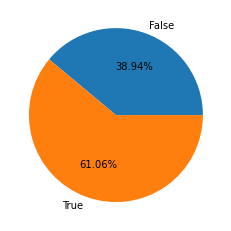

In [36]:
floor_under = pisos.groupby(['has_ac']).sum()


names = floor_under.index
values = floor_under['buy_price']

plt.pie(values,labels=names,autopct='%.2f%%')
plt.show()

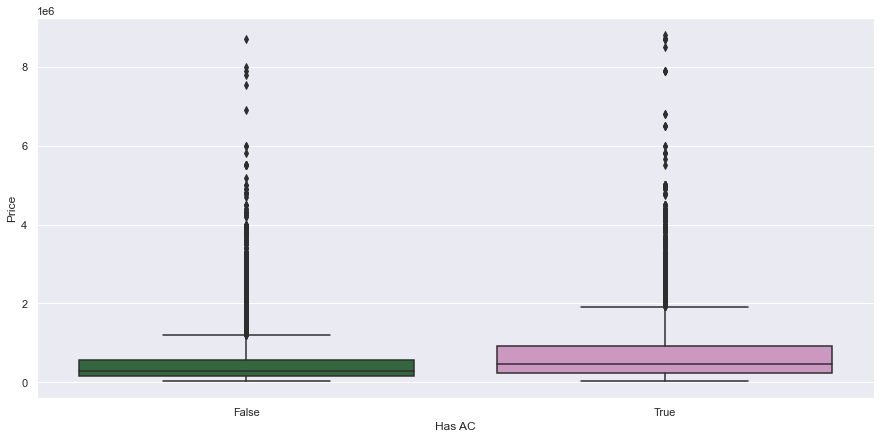

In [87]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="has_ac", y="buy_price", data=pisos, palette=sns.color_palette("cubehelix", 2))
plt.xlabel("Has AC")
plt.ylabel("Price")
plt.show()

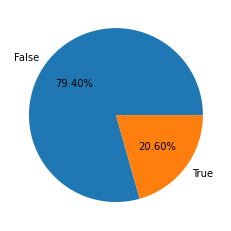

In [38]:
floor_under = pisos.groupby(['is_renewal_needed']).sum()


names = floor_under.index
values = floor_under['buy_price']

plt.pie(values,labels=names,autopct='%.2f%%')
plt.show()

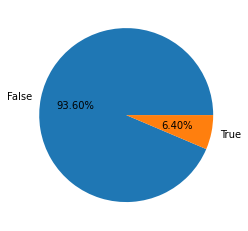

In [39]:
floor_under = pisos.groupby(['is_new_development']).sum()


names = floor_under.index
values = floor_under['buy_price']

plt.pie(values,labels=names,autopct='%.2f%%')
plt.show()

In [40]:
pisos.district_id

id
21742    21
21741    21
21740    21
21739    21
21738    21
         ..
5         2
4         2
3         2
2         2
1         1
Name: district_id, Length: 21600, dtype: object

In [41]:
pisos.head()

,sq_mt_built,n_rooms,n_bathrooms,is_floor_under,buy_price,is_renewal_needed,is_new_development,has_ac,has_fitted_wardrobes,has_lift,...,has_storage_room,is_accessible,has_green_zones,house_type_id_HouseType 1: Pisos,house_type_id_HouseType 2: Casa o chalet,house_type_id_HouseType 4: Dúplex,house_type_id_HouseType 5: Áticos,district_id,has_individual_heating_False,has_individual_heating_True
id,,,,,,,,,,,,,,,,,,,,,
21742,64.0,2,1.0,False,85000,False,False,True,False,False,...,False,False,False,1,0,0,0,21,0,0
21741,70.0,3,1.0,False,129900,True,False,False,True,True,...,False,False,False,1,0,0,0,21,0,0
21740,94.0,2,2.0,False,144247,False,False,False,True,True,...,True,False,False,1,0,0,0,21,0,1
21739,64.0,2,1.0,True,109900,False,False,False,False,True,...,True,True,False,1,0,0,0,21,0,0
21738,108.0,2,2.0,False,260000,False,False,True,True,True,...,True,False,True,1,0,0,0,21,0,0


In [42]:
pisos['has_lift']=pd.to_numeric(pisos['has_lift'],errors='coerce')

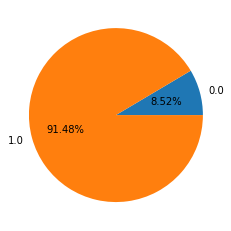

In [43]:
floor_under = pisos.groupby(['has_lift']).sum()


names = floor_under.index
values = floor_under['buy_price']

plt.pie(values,labels=names,autopct='%.2f%%')
plt.show()

In [44]:
pisos['is_exterior']=pd.to_numeric(pisos['is_exterior'],errors='coerce')

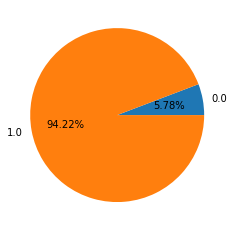

In [45]:
floor_under = pisos.groupby(['is_exterior']).sum()


names = floor_under.index
values = floor_under['buy_price']

plt.pie(values,labels=names,autopct='%.2f%%')
plt.show()

In [46]:
#pisos['floor']=pd.to_numeric(pisos['floor'],errors='coerce')

In [47]:
#pisos['has_fitted_wardrobes']=pd.to_numeric(pisos['has_fitted_wardrobes'],errors='coerce')

In [48]:
#pisos['is_renewal_needed']=pd.to_numeric(pisos['is_renewal_needed'],errors='coerce')

In [49]:
#pisos['has_ac']=pd.to_numeric(pisos['has_ac'],errors='coerce')

In [50]:
pisos['is_floor_under']=pisos['is_floor_under'].fillna("Misc")

In [51]:
pisos=pd.get_dummies(pisos,columns=['is_floor_under'])
#Need to drop one, so why not drop the one I created
pisos.drop(columns='is_floor_under_Misc', inplace=True)
pisos


,sq_mt_built,n_rooms,n_bathrooms,buy_price,is_renewal_needed,is_new_development,has_ac,has_fitted_wardrobes,has_lift,is_exterior,...,has_green_zones,house_type_id_HouseType 1: Pisos,house_type_id_HouseType 2: Casa o chalet,house_type_id_HouseType 4: Dúplex,house_type_id_HouseType 5: Áticos,district_id,has_individual_heating_False,has_individual_heating_True,is_floor_under_False,is_floor_under_True
id,,,,,,,,,,,,,,,,,,,,,
21742,64.0,2,1.0,85000,False,False,True,False,0.0,1.0,...,False,1,0,0,0,21,0,0,1,0
21741,70.0,3,1.0,129900,True,False,False,True,1.0,1.0,...,False,1,0,0,0,21,0,0,1,0
21740,94.0,2,2.0,144247,False,False,False,True,1.0,1.0,...,False,1,0,0,0,21,0,1,1,0
21739,64.0,2,1.0,109900,False,False,False,False,1.0,1.0,...,False,1,0,0,0,21,0,0,0,1
21738,108.0,2,2.0,260000,False,False,True,True,1.0,1.0,...,True,1,0,0,0,21,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,78.0,2,2.0,350000,False,False,True,True,1.0,1.0,...,False,0,0,0,1,2,0,1,1,0
4,96.0,2,2.0,425000,False,False,True,True,1.0,1.0,...,True,1,0,0,0,2,0,1,1,0
3,175.0,4,2.0,680000,False,False,True,True,0.0,1.0,...,False,1,0,0,0,2,0,1,0,1


In [52]:
pisos['buy_price'].max()

8800000

In [53]:
#pisos['has_ac']=pisos['has_ac'].fillna("Misc")

In [54]:
#pisos=pd.get_dummies(pisos,columns=['has_ac'])
#Need to drop one, so why not drop the one I created
#pisos.drop(columns='has_ac_Misc', inplace=True)
#pisos

In [55]:
pisos.dtypes

sq_mt_built                                 float64
n_rooms                                       int64
n_bathrooms                                 float64
buy_price                                     int64
is_renewal_needed                              bool
is_new_development                           object
has_ac                                         bool
has_fitted_wardrobes                           bool
has_lift                                    float64
is_exterior                                 float64
has_garden                                     bool
has_pool                                       bool
has_terrace                                    bool
has_balcony                                    bool
has_storage_room                               bool
is_accessible                                  bool
has_green_zones                                bool
house_type_id_HouseType 1: Pisos              uint8
house_type_id_HouseType 2: Casa o chalet      uint8
house_type_i

In [56]:
X = pisos.drop(columns=['buy_price'])
X = X.astype('category')

In [57]:
# label encoder
from sklearn.preprocessing import LabelEncoder
X=X.apply(LabelEncoder().fit_transform)

In [58]:
X

,sq_mt_built,n_rooms,n_bathrooms,is_renewal_needed,is_new_development,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,...,has_green_zones,house_type_id_HouseType 1: Pisos,house_type_id_HouseType 2: Casa o chalet,house_type_id_HouseType 4: Dúplex,house_type_id_HouseType 5: Áticos,district_id,has_individual_heating_False,has_individual_heating_True,is_floor_under_False,is_floor_under_True
id,,,,,,,,,,,,,,,,,,,,,
21742,49,2,0,0,0,1,0,0,1,0,...,0,1,0,0,0,12,0,0,1,0
21741,55,3,0,1,0,0,1,1,1,0,...,0,1,0,0,0,12,0,0,1,0
21740,79,2,1,0,0,0,1,1,1,0,...,0,1,0,0,0,12,0,1,1,0
21739,49,2,0,0,0,0,0,1,1,0,...,0,1,0,0,0,12,0,0,0,1
21738,93,2,1,0,0,1,1,1,1,0,...,1,1,0,0,0,12,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,63,2,1,0,0,1,1,1,1,0,...,0,0,0,0,1,10,0,1,1,0
4,81,2,1,0,0,1,1,1,1,0,...,1,1,0,0,0,10,0,1,1,0
3,160,4,1,0,0,1,1,0,1,0,...,0,1,0,0,0,10,0,1,0,1


<AxesSubplot:>

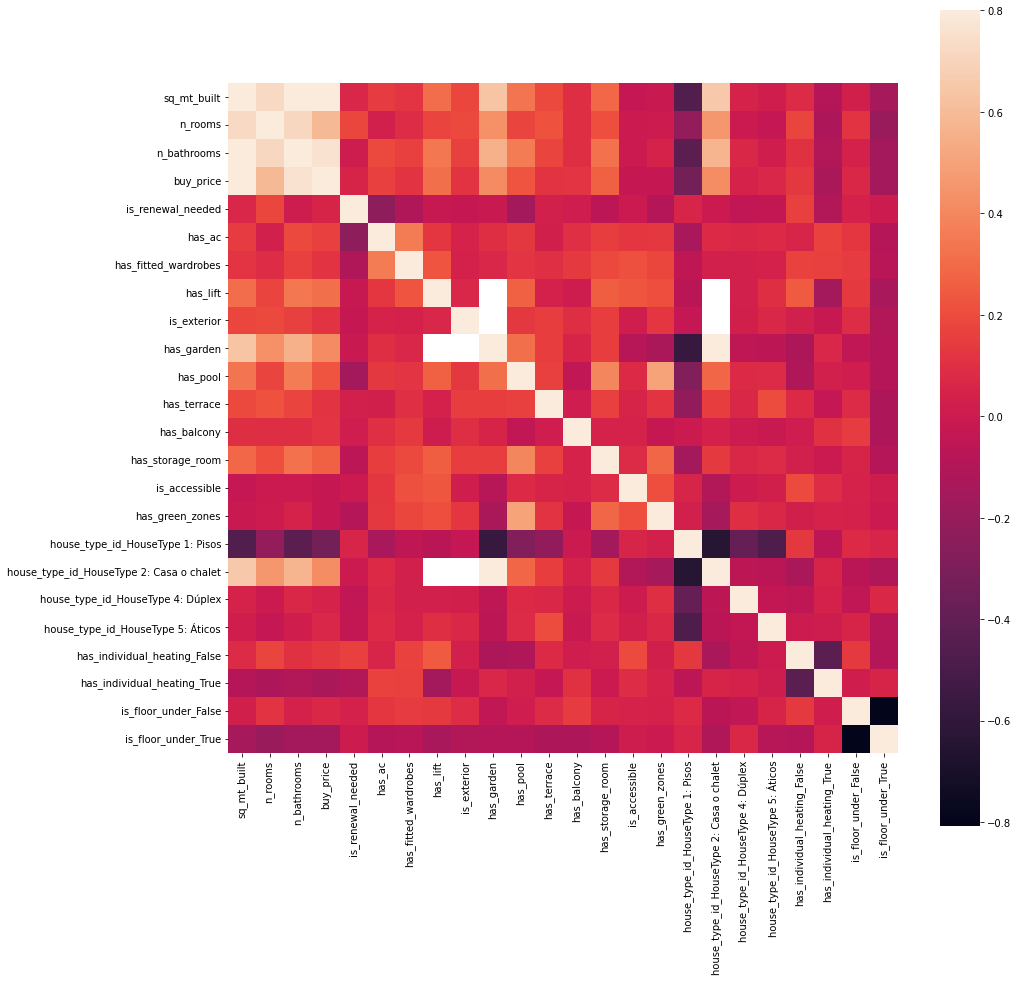

In [59]:
corrmat = pisos.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=.8, square=True)

In [60]:
from sklearn.decomposition import PCA

pca=PCA(n_components=0.95)
reduced=pca.fit_transform(X)

pca.n_components_

1

In [61]:

#X = pisos.drop(columns=['buy_price'])
y = pisos['buy_price']

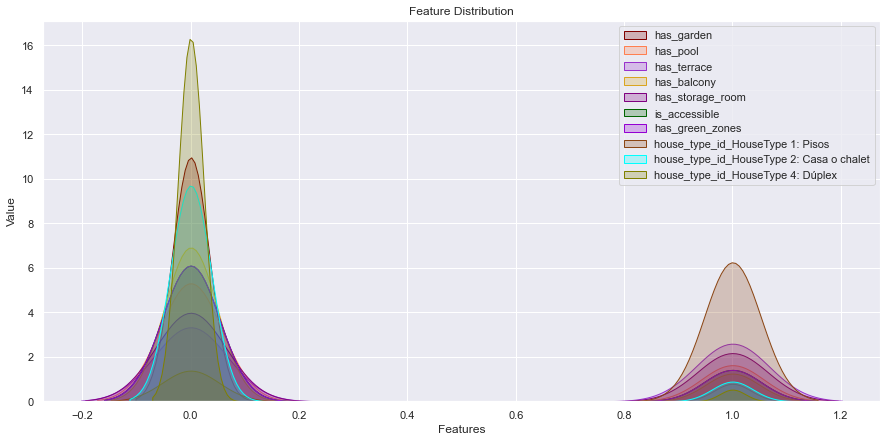

In [74]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in pisos.columns[10:20]:
    index = index + 1
    ax1 = sns.kdeplot(pisos[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.legend(pisos.columns[10:20])
plt.grid(True)
plt.show(fig)

In [ ]:
X.head()

In [ ]:
y

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test =train_test_split(X, y, random_state=5, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression


lr_simple = LinearRegression()
lr_simple.fit(X, y)

In [ ]:
solucion_1= [lr_simple.intercept_,lr_simple.coef_,lr_simple.score(X,y)]
solucion_1

In [ ]:

model = LinearRegression()

In [ ]:
model.fit(X, y)

In [ ]:
solucion=[model.intercept_,model.coef_,model.score(X, y)]

solucion

In [ ]:
xg = xgb.XGBRegressor()


In [ ]:
xg.fit(X, y)

In [ ]:
solucion7=[xg.score(X, y)]

solucion7

In [ ]:
from numpy import asarray
from pandas import read_csv
from xgboost import XGBRegressor

model = XGBRegressor()
# fit model
model.fit(X, y)


In [ ]:
solucion8=[model.score(X, y)]

solucion8

In [ ]:
prueba5 = [60, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 12, 1, 1, 1]
new_data = asarray([prueba5])
# make a prediction
yhat = model.predict(new_data)
# summarize prediction
print('Predicted: %.3f' % yhat)

# 680457 Euros

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR(kernel="linear", C=1.0, epsilon=0.2)

In [ ]:
svr.fit(x_train, y_train)

In [ ]:
solucion_2=[svr.intercept_,svr.coef_,svr.score(X,y)]

solucion_2

In [ ]:
from sklearn.tree import DecisionTreeRegressor
adr = DecisionTreeRegressor(max_depth=5)

In [ ]:
adr.fit(x_train, y_train)

In [ ]:
y_pred = adr.predict(x_test)
y_pred

In [ ]:
y_test

In [ ]:
print("Datos del Modelo de árboles de decision Regresión")
print()
print("Precisión del modelo:")
print(adr.score(x_train, y_train))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poli_reg = PolynomialFeatures(degree= 2)

In [ ]:
X_train_poli = poli_reg.fit_transform(x_train)
X_test_poli = poli_reg.fit_transform(x_test)

In [ ]:
pr = linear_model.LinearRegression()

In [ ]:
pr.fit(X_train_poli, y_train)

In [ ]:
y_pred = pr.predict(X_test_poli)
y_pred

In [ ]:
y_test

In [ ]:
print("Precisión del modelo: ")
print(pr.score(X_train_poli, y_train))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
bar = RandomForestRegressor(n_estimators=300, max_depth=8)

In [ ]:
bar.fit(x_train, y_train)

In [ ]:
y_pred = bar.predict(x_test)
y_pred

In [ ]:
y_test

In [ ]:
print("Datos del modelo Bosques Aleatorios Regresión")
print()
print("precisión del modelo:")
print(bar.score(x_train, y_train))

In [ ]:
prueba = [[60, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 12, 1, 1, 1]]

In [ ]:
resultado_prueba = bar.predict(prueba)
resultado_prueba

# El precio 332336 euros

In [ ]:
from sklearn.model_selection import GridSearchCV
params = [{
        'n_neighbors': [5,10,50,100,1000],
    }]
kgrid = GridSearchCV(estimator=KNeighborsRegressor(),           
                      param_grid=params, 
                      cv=5,
                      verbose=0) 
kgrid.fit(x_train, y_train)
print(kgrid.best_score_)
print(kgrid.best_estimator_)
print(kgrid.best_params_)
print(list(zip(kgrid.cv_results_['params'],kgrid.cv_results_['mean_test_score'])))

In [ ]:
#RandomForestRegressor
params = [{
'max_depth': [10,100,1000],
'min_samples_split': [10,100,1000],
'n_estimators': [100,300,500],
    }]
fgrid = GridSearchCV(estimator=RandomForestRegressor(),           
                      param_grid=params, 
                      cv=5,
                      verbose=0) 
fgrid.fit(x_train, y_train)
print(fgrid.best_score_)
print(fgrid.best_estimator_)
print(fgrid.best_params_)
print(list(zip(fgrid.cv_results_['params'],fgrid.cv_results_['mean_test_score'])))

In [ ]:
prueba6 = [60, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 12, 1, 1, 1]
new_data = asarray([prueba6])
# make a prediction
yhat = fgrid.predict(new_data)
# summarize prediction
print('Predicted: %.3f' % yhat)